IA & Data science (LU3IN026) -- Projet MNIST -- 2019-2020
--------


<font size="+1" color="RED">**Realisé par BOUSBA Abdellah**

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
%matplotlib inline  

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut


<ins> Classes binaires :
--------


In [57]:
mnist_df_train = pd.read_csv("data/train.csv",sep=';')
mnist_df_test = pd.read_csv("data/test.csv",sep=';')
mnist_df_eval = pd.read_csv("data/eval.csv",sep=';')
names = pd.read_csv("data/names.csv",sep=';').columns.values

In [58]:
mnist_df_train.columns = names
mnist_df_test.columns = names
mnist_df_eval.columns = names

In [59]:
mnist_df_train

,ident,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,10006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
995,10997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,10998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,10999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
mnist_df_test

,ident,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,20002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,20003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,20004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,20005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,20006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
995,20997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,20998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,20999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
mnist_df_eval

,ident,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,90002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,90996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,90997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,90998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,90999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
train = mnist_df_train.iloc[:, 1:-1].values,mnist_df_train.iloc[:, -1].values
test = mnist_df_test.iloc[:, 1:-1].values,mnist_df_test.iloc[:, -1].values
evaal = mnist_df_eval.iloc[:, 1:-1].values,mnist_df_eval.iloc[:, -1].values

Calcul d'accuracy:
--------


In [8]:
def getAccuracy(Liste_Classifiers,training,testing):
    print("\n*****\nAffichage des résultats:")
    for k in range(0,len(Liste_Classifiers)):
        print("Classifieur ", Liste_Classifiers[k].toString())
        Liste_Classifiers[k].train(training[0],training[1])
        print("\t Accuracy :", Liste_Classifiers[k].accuracy(testing[0],testing[1]))

In [9]:

Liste_Classifiers = []
Liste_Classifiers.append(cl.ClassifierLineaireRandom(train[0].shape[1]))
Liste_Classifiers.append(cl.ClassifierArbreDecision(train[0].shape[1],0.0,names))
Liste_Classifiers.append(cl.ClassifierArbreDecision(train[0].shape[1],0.25,names))
Liste_Classifiers.append(cl.ClassifierPerceptron(train[0].shape[1],0.01))
Liste_Classifiers.append(cl.ClassifierPerceptron(train[0].shape[1],0.001))
Liste_Classifiers.append(cl.ClassifierPerceptron(train[0].shape[1],0.0001))
Liste_Classifiers.append(cl.ClassifierKNN(train[0].shape[1],1))
Liste_Classifiers.append(cl.ClassifierKNN(train[0].shape[1],5))
Liste_Classifiers.append(cl.ClassifierKNN(train[0].shape[1],10))

getAccuracy(Liste_Classifiers,train,test)


*****
Affichage des résultats:
Classifieur  ClassifierLineaireRandom
	 Accuracy : 44.24424424424424
Classifieur  ClassifierArbreDecision eps=0.0
	 Accuracy : 68.86886886886887
Classifieur  ClassifierArbreDecision eps=0.25
	 Accuracy : 68.86886886886887
Classifieur  ClassifierPerceptron rate=0.01
	 Accuracy : 86.68668668668668
Classifieur  ClassifierPerceptron rate=0.001
	 Accuracy : 85.88588588588588
Classifieur  ClassifierPerceptron rate=0.0001
	 Accuracy : 86.78678678678679
Classifieur  ClassifierKNN n=1
	 Accuracy : 93.4934934934935
Classifieur  ClassifierKNN n=5
	 Accuracy : 94.5945945945946
Classifieur  ClassifierKNN n=10
	 Accuracy : 93.69369369369369


Generation des fichiers resultats :
--------


    prenant les deux classifieurs Perceptron et KNN pour generer les fichiers resultat ci dessus:
        - resultat-1.csv : KNN avec k=5 ( meilleur performance)
        - resultat-2.csv : KNN avec k=1
        - resultat-3.csv : Perceptron avec rate=0.01
        - resultat-4.csv : Perceptron avec rate=0.001
    comme le classifieur lineaire et de l'arbre de decision ont une accuracy < 70% je les ai pas utilisé pour eval.

In [23]:
res1 = pd.DataFrame(columns = ['ident', 'label'])
res2 = pd.DataFrame(columns = ['ident', 'label'])
res3 = pd.DataFrame(columns = ['ident', 'label'])
res4 = pd.DataFrame(columns = ['ident', 'label'])

liste = []
liste.append(cl.ClassifierKNN(train[0].shape[1],5))
liste.append(cl.ClassifierKNN(train[0].shape[1],1))
liste.append(cl.ClassifierPerceptron(train[0].shape[1],0.01))
liste.append(cl.ClassifierPerceptron(train[0].shape[1],0.001))

liste[0].train(train[0],train[1])
liste[1].train(train[0],train[1])
liste[2].train(train[0],train[1])
liste[3].train(train[0],train[1])


In [25]:
i=0
for row in evaal[0]:
    res1.loc[i] = [i+90002,liste[0].predict(row)]
    res2.loc[i] = [i+90002,liste[1].predict(row)]
    res3.loc[i] = [i+90002,liste[2].predict(row)]
    res4.loc[i] = [i+90002,liste[3].predict(row)]
    i+=1

In [29]:
res1.to_csv("resultat-1.csv",sep=';',index=False)
res2.to_csv("resultat-2.csv",sep=';',index=False)
res3.to_csv("resultat-3.csv",sep=';',index=False)
res4.to_csv("resultat-4.csv",sep=';',index=False)

<ins> Multiclasses :
--------


In [2]:
multi_mnist_df_train = pd.read_csv("multiclasses/train_multi.csv",sep=';')
multi_mnist_df_test = pd.read_csv("multiclasses/test_multi.csv",sep=';')
multi_mnist_df_eval = pd.read_csv("multiclasses/eval_multi.csv",sep=';')
multi_names = pd.read_csv("multiclasses/names.csv",sep=';').columns.values

In [3]:
multi_mnist_df_train.columns = multi_names
multi_mnist_df_test.columns = multi_names
multi_mnist_df_eval.columns = multi_names

In [4]:
multi_mnist_df_train

,ident,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,11996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1995,11997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1996,11998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1997,11999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [5]:
multi_mnist_df_test

,ident,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,20002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,21996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1995,21997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1996,21998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1997,21999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [6]:
multi_mnist_df_eval

,ident,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,90002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,90005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,90006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,91996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1995,91997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1996,91998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1997,91999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


One vs All :
---

    Using KNN with k=5 (training):

In [9]:
data = []
for i in range(10):
    train = multi_mnist_df_train.copy()
    train.loc[train['label'] != i,'label'] = -1
    train.loc[train['label'] == i,'label'] = 1
    train = (train.iloc[:, 1:-1].values,train.iloc[:, -1].values)
    data.append(train)

In [10]:
size = data[0][0].shape[1]
k = 5
LC = [] # liste des classifieurs pour chaque digit
for i in range(10):
    LC.append(cl.ClassifierKNN(size,k))
    LC[i].train(data[i][0],data[i][1])

    Testing accuracy of 3 exemples :

In [7]:
def showDigit(dataset,line):
    img = dataset.iloc[line][1:785].values.reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.show()

[-5 -5 -5 -5 -5 -5 -5  5 -5 -5]
predectring it's a :  7
real digit was : 


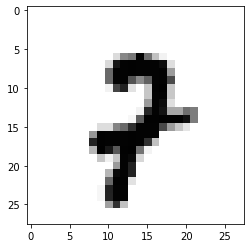

[-5 -5 -5 -5 -5 -5  5 -5 -5 -5]
predectring it's a :  6
real digit was : 


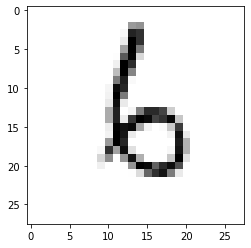

[-5 -5 -5  5 -5 -5 -5 -5 -5 -5]
predectring it's a :  3
real digit was : 


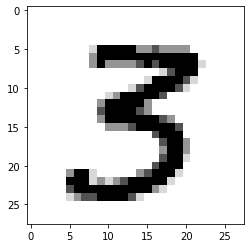

In [10]:
for _ in range(3):
    line = rd.randint(0,1999)
    x = multi_mnist_df_test.iloc[line][1:785]
    tab = []
    for i in range(10):
        tab.append(LC[i].score(x))
    tab = np.asarray(tab)
    print(tab)
    print("predectring it's a : ",np.argmax(tab))
    print("real digit was : ")
    showDigit(multi_mnist_df_test,line)

    Calcul d'accuracy :


In [11]:
multi_test = multi_mnist_df_test.iloc[:, 1:-1].values,multi_mnist_df_test.iloc[:, -1].values

In [27]:
def getAccuracy2(LC,DS):
    i = 0
    acc=0
    for x in DS[0] :
        tab = []
        for j in range(10):
            tab.append(LC[j].score(x))
        tab = np.asarray(tab)
        if(np.argmax(tab) == DS[1][i]):
            acc+=1
        i+=1
        
    return acc/DS[0].shape[0]*100

In [28]:
getAccuracy2(LC,multi_test)

90.24512256128064

In [14]:
res_multi = pd.DataFrame(columns = ['ident', 'label'])
eval_multi = multi_mnist_df_eval.iloc[:, 1:-1].values,multi_mnist_df_eval.iloc[:, -1].values
i=0
for row in eval_multi[0]:
    tab = []
    for j in range(10):
        tab.append(LC[j].score(row))
    tab = np.asarray(tab)
    res_multi.loc[i] = [i+90002,np.argmax(tab)]
    i+=1


    - resultat_multi.csv : KNN avec k=5 multiclass

In [15]:
res_multi.to_csv("resultat_multi.csv",sep=';',index=False)